In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

pd.set_option('display.max_columns', None)

In [163]:
test_df = pd.read_csv("test.csv", usecols=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"])
train_df = pd.read_csv("train.csv", usecols=["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [164]:
test_df.describe(include="all")

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418,332.000000,418.000000,418.000000,417.000000,91,418
unique,NaN,2,NaN,NaN,NaN,NaN,76,3
top,NaN,male,NaN,NaN,NaN,NaN,B57 B59 B63 B66,S
freq,NaN,266,NaN,NaN,NaN,NaN,3,270
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN,NaN
std,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN,NaN


In [165]:
train_df = train_df[train_df["Embarked"].notna()]
train_df = train_df[train_df["Age"].notna()]
test_df["Age"].fillna(0, inplace=True)
test_df["Fare"].fillna(0, inplace=True)

In [166]:
train_df["InCabin"] = train_df.apply(lambda x: 1 if type(x["Cabin"]) == str else 0, axis=1)
test_df["InCabin"] = test_df.apply(lambda x: 1 if type(x["Cabin"]) == str else 0, axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,InCabin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q,0
886,0,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,1
889,1,1,male,26.0,0,0,30.0000,C148,C,1


In [167]:
train_df["CabinArea"] = train_df.apply(lambda x: x["Cabin"][0] if type(x["Cabin"]) == str else "N", axis=1)
test_df["CabinArea"] = test_df.apply(lambda x: x["Cabin"][0] if type(x["Cabin"]) == str else "N", axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,InCabin,CabinArea
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,N
1,1,1,female,38.0,1,0,71.2833,C85,C,1,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,N
3,1,1,female,35.0,1,0,53.1000,C123,S,1,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,N
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q,0,N
886,0,2,male,27.0,0,0,13.0000,NaN,S,0,N
887,1,1,female,19.0,0,0,30.0000,B42,S,1,B
889,1,1,male,26.0,0,0,30.0000,C148,C,1,C


In [168]:
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

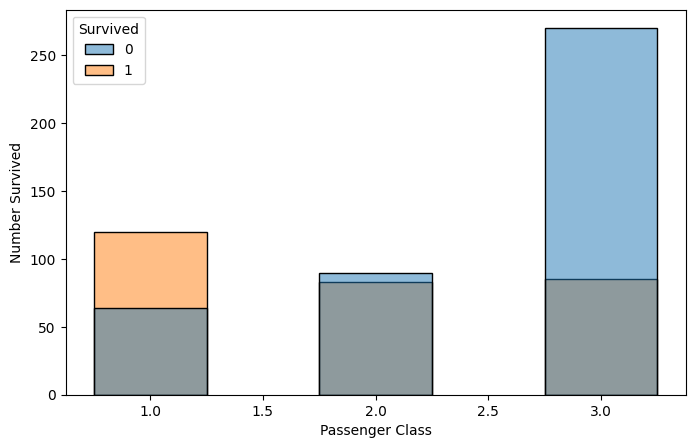

In [169]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Pclass", ax=ax, hue="Survived", bins=3, binrange=[0.5, 3.5], shrink=0.5)
ax.set(xlabel="Passenger Class", ylabel="Number Survived")
plt.show()

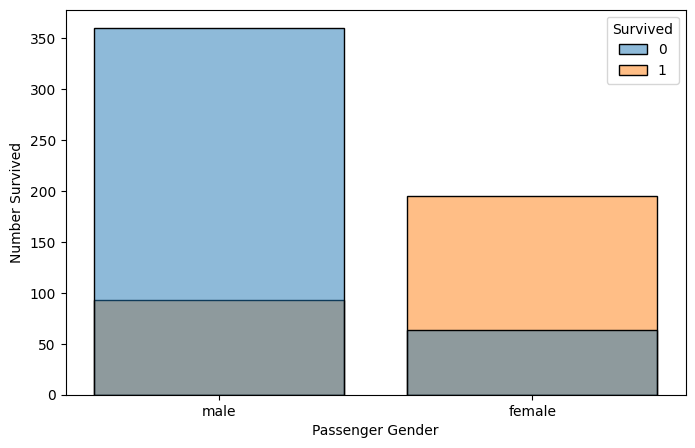

In [170]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Sex", ax=ax, hue="Survived", shrink=0.8)
ax.set(xlabel="Passenger Gender", ylabel="Number Survived")
plt.show()

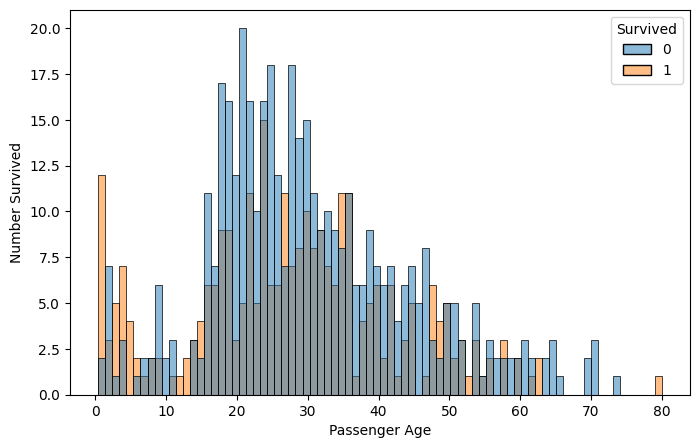

In [171]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Age", ax=ax, hue="Survived", bins=80)
ax.set(xlabel="Passenger Age", ylabel="Number Survived")
plt.show()

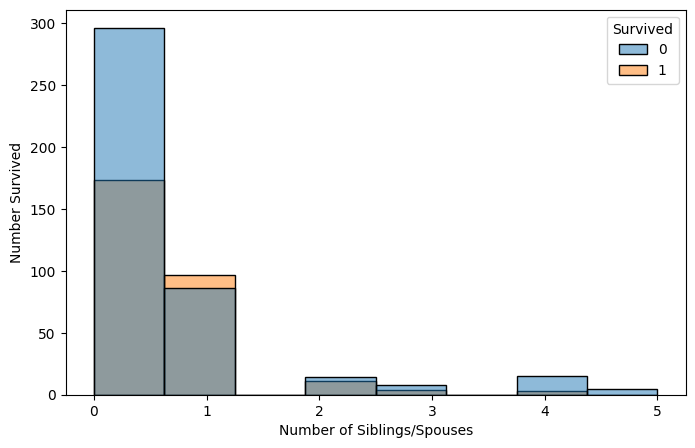

In [172]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="SibSp", ax=ax, hue="Survived", bins=8)
ax.set(xlabel="Number of Siblings/Spouses", ylabel="Number Survived")
plt.show()

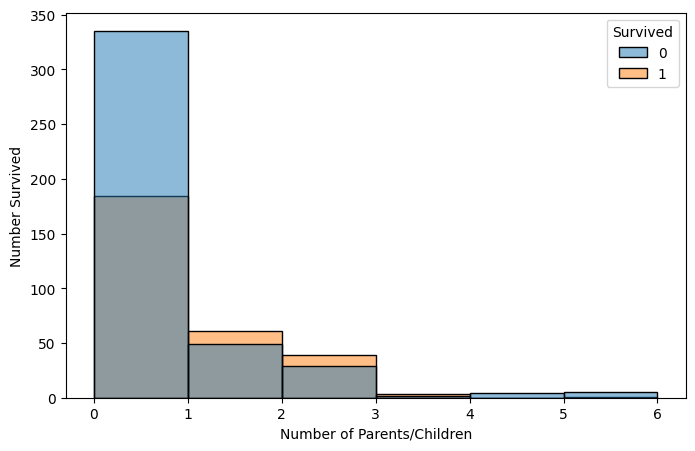

In [173]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Parch", ax=ax, hue="Survived", bins=6)
ax.set(xlabel="Number of Parents/Children", ylabel="Number Survived")
plt.show()

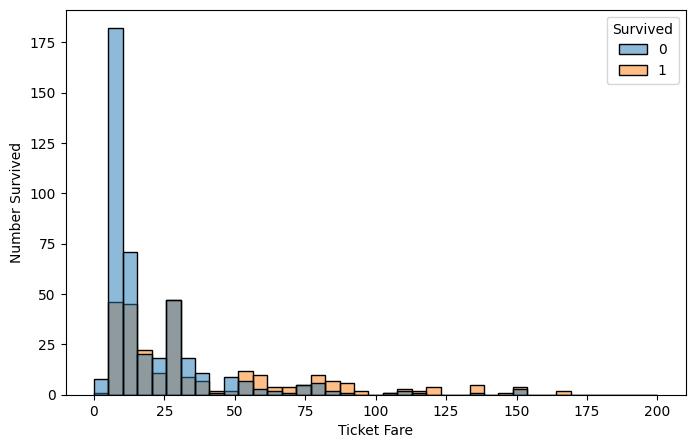

In [174]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Fare", ax=ax, hue="Survived", binrange=[0, 200])
ax.set(xlabel="Ticket Fare", ylabel="Number Survived")
plt.show()

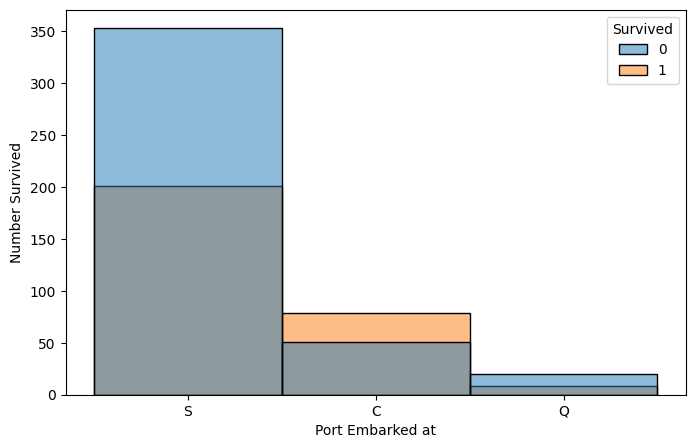

In [175]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Embarked", ax=ax, hue="Survived")
ax.set(xlabel="Port Embarked at", ylabel="Number Survived")
plt.show()

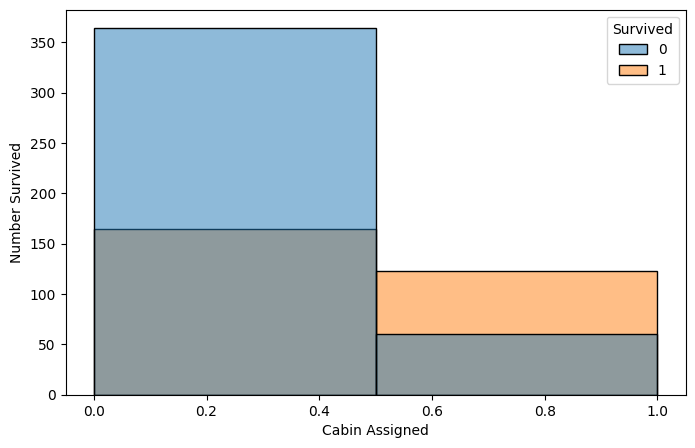

In [176]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="InCabin", ax=ax, hue="Survived", bins=2)
ax.set(xlabel="Cabin Assigned", ylabel="Number Survived")
plt.show()

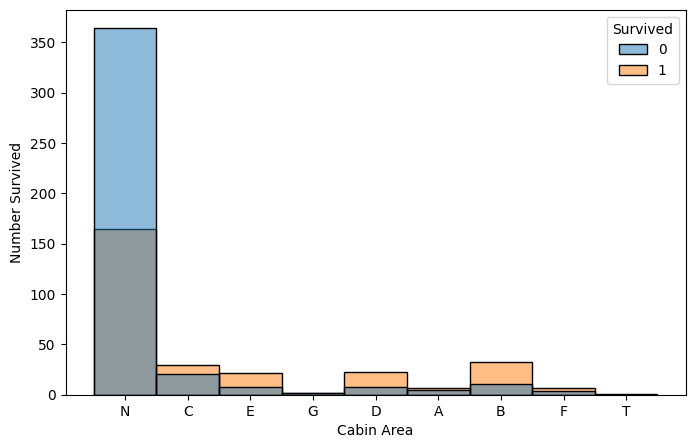

In [177]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="CabinArea", ax=ax, hue="Survived")
ax.set(xlabel="Cabin Area", ylabel="Number Survived")
plt.show()

In [178]:
features_to_normalise = [
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare"
]

features_to_encode = [
    "Sex",
    "Embarked",
    "CabinArea"
]

for feature in features_to_normalise:
    test_df[feature] = test_df[feature]/train_df[feature].max()
    train_df[feature] = train_df[feature]/train_df[feature].max()

test_to_merge = [test_df]
train_to_merge = [train_df]

for feature in features_to_encode:
    temp = pd.get_dummies(test_df[feature])
    for name in temp.columns:
        temp.rename({name: feature + "_" + str(name)}, axis=1, inplace=True)
    test_to_merge.append(temp)

for feature in features_to_encode:
    temp = pd.get_dummies(train_df[feature])
    for name in temp.columns:
        temp.rename({name: feature + "_" + str(name)}, axis=1, inplace=True)
    train_to_merge.append(temp)

concat_test_df = pd.concat(test_to_merge, axis=1)
concat_train_df = pd.concat(train_to_merge, axis=1)
concat_test_df.drop(features_to_encode, axis=1, inplace=True)
concat_train_df.drop(features_to_encode, axis=1, inplace=True)

concat_train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,InCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,CabinArea_A,CabinArea_B,CabinArea_C,CabinArea_D,CabinArea_E,CabinArea_F,CabinArea_G,CabinArea_N,CabinArea_T
0,0,1.000000,0.2750,0.2,0.000000,0.014151,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0.333333,0.4750,0.2,0.000000,0.139136,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,1.000000,0.3250,0.0,0.000000,0.015469,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0.333333,0.4375,0.2,0.000000,0.103644,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,1.000000,0.4375,0.0,0.000000,0.015713,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,1.000000,0.4875,0.0,0.833333,0.056848,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
886,0,0.666667,0.3375,0.0,0.000000,0.025374,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
887,1,0.333333,0.2375,0.0,0.000000,0.058556,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
889,1,0.333333,0.3250,0.0,0.000000,0.058556,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [179]:
concat_test_df["CabinArea_T"] = pd.Series(0, index=concat_test_df.index)

concat_test_df

,Pclass,Age,SibSp,Parch,Fare,InCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,CabinArea_A,CabinArea_B,CabinArea_C,CabinArea_D,CabinArea_E,CabinArea_F,CabinArea_G,CabinArea_N,CabinArea_T
0,1.000000,0.43125,0.0,0.000000,0.015282,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,1.000000,0.58750,0.2,0.000000,0.013663,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.666667,0.77500,0.0,0.000000,0.018909,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,1.000000,0.33750,0.0,0.000000,0.016908,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,1.000000,0.27500,0.2,0.166667,0.023984,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.000000,0.00000,0.0,0.000000,0.015713,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
414,0.333333,0.48750,0.0,0.000000,0.212559,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
415,1.000000,0.48125,0.0,0.000000,0.014151,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
416,1.000000,0.00000,0.0,0.000000,0.015713,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [180]:
train_features = concat_train_df.drop("Survived", axis=1)
train_labels = concat_train_df["Survived"]

In [181]:
def train_model(model, train_features, train_labels):
    X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, shuffle=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, predictions)*100, 2)
    f1 = round(f1_score(y_test, predictions, average='weighted')*100, 2)
    print(f"Accuracy: {accuracy}%")
    print(f"F1-score: {f1}%")
    return accuracy, f1 

In [182]:
print("Random Forest Classifier")

random_forest_stats = train_model(RandomForestClassifier(), train_features, train_labels)

Random Forest Classifier
Accuracy: 82.52%
F1-score: 82.11%


In [183]:
print("Decision Tree Classifier")

decision_tree_stats = train_model(DecisionTreeClassifier(), train_features, train_labels)

Decision Tree Classifier
Accuracy: 75.52%
F1-score: 75.49%


In [184]:
print("Support Vector Machine")
print("Linear Kernel")

linear_svm_stats = train_model(svm.SVC(kernel="linear"), train_features, train_labels)

Support Vector Machine
Linear Kernel
Accuracy: 74.83%
F1-score: 74.83%


In [185]:
print("Support Vector Machine")
print("Polynomial Kernel")

poly_svm_stats = train_model(svm.SVC(kernel="poly"), train_features, train_labels)

Support Vector Machine
Polynomial Kernel
Accuracy: 83.92%
F1-score: 83.69%


In [186]:
print("Support Vector Machine")
print("RBF Kernel")

rbf_svm_stats = train_model(svm.SVC(kernel="rbf"), train_features, train_labels)

Support Vector Machine
RBF Kernel
Accuracy: 82.52%
F1-score: 82.39%


In [187]:
print("Support Vector Machine")
print("Sigmoid Kernel")

sigmoid_svm_stats = train_model(svm.SVC(kernel="sigmoid"), train_features, train_labels)

Support Vector Machine
Sigmoid Kernel
Accuracy: 69.93%
F1-score: 70.11%


In [188]:
model = RandomForestClassifier()
model.fit(train_features, train_labels)
predictions = model.predict(concat_test_df)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [189]:
submission = pd.read_csv("test.csv", usecols=["PassengerId"])
submission["Survived"] = predictions
submission.to_csv("Submission.csv", index=False)